### Computer Vision libraries

* **torchvision** -> base domain library for Computer Vsion
* **torchvision.datasets** -> get datasets and data loading functions from computer vision
* **torchvision.models** -> get pretrained models that you can leverage for your own problem
* **torchvision.transforms** -> get functions for manipulating your vision data (images) to be suitable for use with ML model
* **torch.utils.data.Dataset** -> base dataset class for pytorch
* **torch.utils.data.DataLoader** -> creates a python iterable over a dataset

In [3]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


### Getting a Dataset

* **FashionMNIST** dataset

In [4]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download = True,
    transform= ToTensor(),
    target_transform= None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    download = True,
    train = False,
    transform = ToTensor(),
    target_transform = None
)

Using downloaded and verified file: data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202434.68it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3723814.81it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6141148.18it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# print the firsts training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
# get the classes of training data

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_targets = train_data.targets
train_targets


tensor([9, 0, 0,  ..., 3, 0, 5])

### Checking input and output shapes of our data

In [10]:
print(f'Shape of our image is: {image.shape} -> (color, height, width)')
print(f'Label of our image is: {label}')

Shape of our image is: torch.Size([1, 28, 28]) -> (color, height, width)
Label of our image is: 9


### Visualizing our data

Image Shape: torch.Size([1, 28, 28])
Image Shape after squeezing: torch.Size([28, 28])


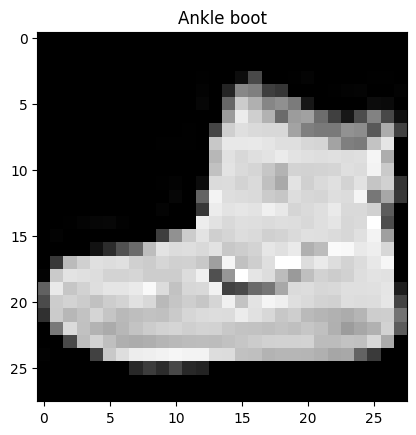

In [11]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
print(f"Image Shape after squeezing: {image.squeeze().shape}")
plt.title(class_names[label])
plt.imshow(image.squeeze(), cmap = 'gray')
plt.show()

### Plot more images

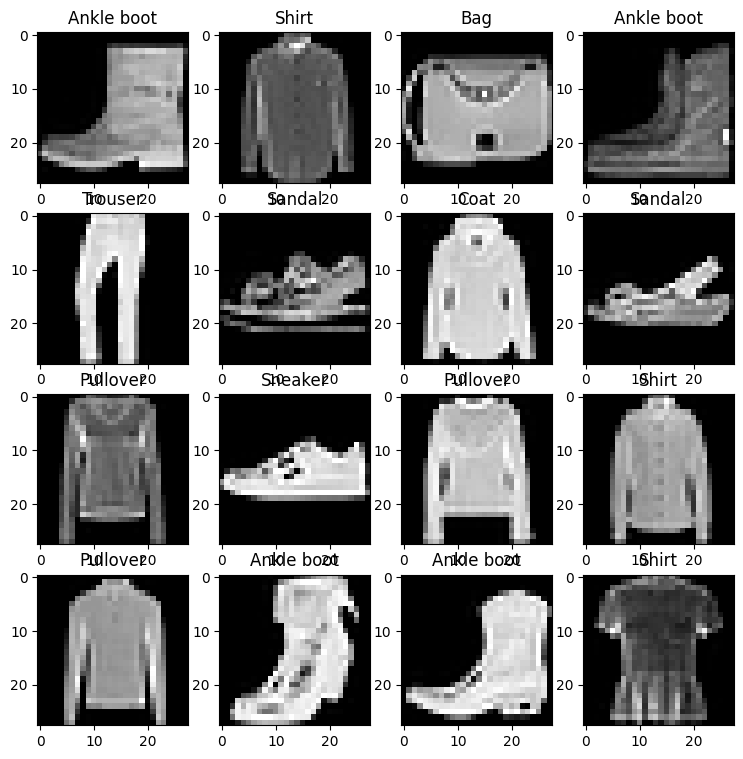

In [12]:
torch.manual_seed(42)

fig = plt.figure(figsize=[9,9])
row, col = 4,4

for i in range(1,row*col+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(row, col,i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])

### Prepare DataLoader

In [13]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
from torch.utils.data.dataloader import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                          batch_size = 32,
                         shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                          batch_size = 32,
                         shuffle = False)

In [16]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)}, batch_size: {train_dataloader.batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)}, batch_size: {test_dataloader.batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78eaa7c3fd30>, <torch.utils.data.dataloader.DataLoader object at 0x78eaa7d0e110>)
Length of train dataloader: 1875, batch_size: 32
Length of test dataloader: 313, batch_size: 32


In [17]:
# check out whats inside the training dataloader

train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### Visualize a sample

Image size: torch.Size([1, 28, 28])
Image label: 6


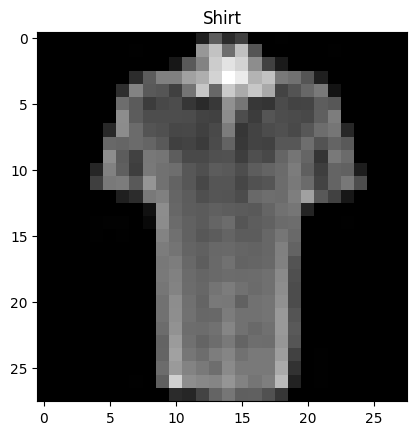

In [18]:
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Image label: {label}")

### Building a Computer Vision Model --- Baseline Model

In [19]:
# Create a faltten layer

flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [20]:
class fashionModelV0(nn.Module):
  def __init__(self, input_features: int,
               output_features: int, hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_stack(x)


In [21]:
model0 = fashionModelV0(input_features=784, output_features=len(class_names),
                        hidden_units=10)
model0

fashionModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
# Create a dummy input to feed

dummy_x = torch.rand([1,1,28,28])
model0(dummy_x).shape

torch.Size([1, 10])

In [23]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

### Setup loss function and optimizer

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr = 0.1)

### Downloading the helper_function.py

In [25]:
from pathlib import Path
import requests

if Path('helper_function.py').is_file():
  print('helper_function.py already exists! Skipping download ...')
else:
  print('Downloading helper_function.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_function.py', 'wb') as f:
    f.write(request.content)

In [26]:
# import accuracy_function from helper_function.py

from helper_function import accuracy_fn

### Creating a function to time our experiments

In [27]:
from timeit import default_timer as timer

def print_traintime(start:float,
                    end:float,
                    device: torch.device = None):
  totaltime = end - start
  print(f"Train time on {device}: {totaltime:3f} seconds")

In [28]:
start_time = timer()


end_time = timer()

print_traintime(start_time, end_time, device='cpu')

Train time on cpu: 0.000040 seconds


### Creating a training loop and training a model on batches of data

In [29]:
from tqdm.auto import tqdm

torch.manual_seed(42)
start_time_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  # training
  trainLoss = 0

  for batch, (img,label) in enumerate(train_dataloader):
    model0.train()
    y_pred = model0(img)
    loss = loss_fn(y_pred, label)
    trainLoss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 200 == 0:
      print(f'Looked at: {batch * len(img)}/ {len(train_dataloader.dataset)} samples')
  trainLoss = trainLoss/len(train_dataloader)

  # testing

  testLoss, testAcc = 0,0
  model0.eval()
  with torch.inference_mode():
    for x_test, y_test in test_dataloader:
      test_pred = model0(x_test)
      testLoss += loss_fn(test_pred, y_test)
      testAcc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    testLoss /= len(test_dataloader)
    testAcc /= len(test_dataloader)
    print(f"\nTrain Loss: {trainLoss:.4f} | Test Loss: {testLoss:.4f} | Test Acc: {testAcc:.4f}")
    end_time_on_cpu = timer()
    total_time = print_traintime(start_time_on_cpu,
                                  end_time_on_cpu,
                                  str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at: 0/ 60000 samples
Looked at: 6400/ 60000 samples
Looked at: 12800/ 60000 samples
Looked at: 19200/ 60000 samples
Looked at: 25600/ 60000 samples
Looked at: 32000/ 60000 samples
Looked at: 38400/ 60000 samples
Looked at: 44800/ 60000 samples
Looked at: 51200/ 60000 samples
Looked at: 57600/ 60000 samples

Train Loss: 0.5948 | Test Loss: 0.5164 | Test Acc: 81.8391
Train time on cpu: 9.369566 seconds
Epoch: 1
------
Looked at: 0/ 60000 samples
Looked at: 6400/ 60000 samples
Looked at: 12800/ 60000 samples
Looked at: 19200/ 60000 samples
Looked at: 25600/ 60000 samples
Looked at: 32000/ 60000 samples
Looked at: 38400/ 60000 samples
Looked at: 44800/ 60000 samples
Looked at: 51200/ 60000 samples
Looked at: 57600/ 60000 samples

Train Loss: 0.4795 | Test Loss: 0.4814 | Test Acc: 83.1769
Train time on cpu: 18.818205 seconds
Epoch: 2
------
Looked at: 0/ 60000 samples
Looked at: 6400/ 60000 samples
Looked at: 12800/ 60000 samples
Looked at: 19200/ 60000 samples
Looked

### Make predictions and get model results

In [30]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0

  model.eval()
  with torch.inference_mode():
    for x, y in test_dataloader:
      y_pred = model0(x)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))
    loss /= len(test_dataloader)
    acc /= len(test_dataloader)

  return {'model_name:':model.__class__.__name__,
          'model_loss:': loss.item(),
          'model_acc': acc}

In [31]:
model0_results = eval_model(model0, test_dataloader,
                            loss_fn, accuracy_fn)
model0_results

{'model_name:': 'fashionModelV0',
 'model_loss:': 0.4777321219444275,
 'model_acc': 83.49640575079871}

### Setup a device agnostic code

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [33]:
!nvidia-smi

Tue Sep 26 04:51:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Creating a model with non linear activation functions

In [34]:
class fashionModelV1(nn.Module):
  def __init__(self, input_features:int, output_features:int,
               hidden_units:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x:torch.Tensor)-> torch.Tensor:
    return self.layer_stack(x)

In [35]:
model1 = fashionModelV1(input_features=784,
                        output_features= len(class_names),
                        hidden_units= 10).to(device)
model1

fashionModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [36]:
loss1 = nn.CrossEntropyLoss()
optim1 = torch.optim.SGD(params = model1.parameters(),
                         lr = 0.1)

### Functionizing training and evaluating/testing loops

* training loop - train_step()
* testing loop - test_step()

In [37]:
# Traing and Testing loop to check for loss on each batch (batch_size=32)

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               accuracy,
               device: torch.device=device):

  model.train()
  trainLoss, trainAcc = 0, 0

  # training part
  for batch, (x_train, y_train) in enumerate(data_loader):
    x_train, y_train = x_train.to(device), y_train.to(device)
    train_preds = model(x_train)
    loss = loss_fn(train_preds, y_train)
    trainLoss += loss
    trainAcc += accuracy_fn(y_train, train_preds.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

      # print the results
    if batch % 400 == 0:
      print(f'Looked at {batch * len(img)}/{len(data_loader.dataset)} samples.')
  trainLoss= trainLoss/len(data_loader)
  trainAcc = trainAcc/len(data_loader)
  print(f'\nTrain Loss: {trainLoss:.4f} | Train Acc: {trainAcc:.2f}%\n')


In [38]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy,
               device: torch.device = device):
   # testing part

   testLoss, testAcc = 0, 0
   model.eval()
   with torch.inference_mode():
    for x_test, y_test in data_loader:
      x_test, y_test = x_test.to(device), y_test.to(device)
      test_preds = model(x_test)
      testLoss += loss_fn(test_preds, y_test)
      testAcc += accuracy_fn(y_test, test_preds.argmax(dim=1))

    testLoss= testLoss/len(data_loader)
    testAcc = testAcc/len(data_loader)
    print(f"Test Loss: {testLoss:.4f} | Test Acc: {testAcc:.2f}%\n")



In [39]:
torch.manual_seed(42)

timer_on_gpu_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')
  train_step(model = model1,
             data_loader = train_dataloader,
             optimizer = optim1,
             loss_fn = loss1,
             accuracy = accuracy_fn,
             device = device)

  test_step(model = model1,
             data_loader = test_dataloader,
             loss_fn = loss1,
             accuracy = accuracy_fn,
             device = device)

timer_on_gpu_end = timer()
total_time = print_traintime(timer_on_gpu_start, timer_on_gpu_end, device)
print(total_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.6866 | Train Acc: 75.14%

Test Loss: 0.5488 | Test Acc: 80.52%

Epoch: 1
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4805 | Train Acc: 82.62%

Test Loss: 0.5084 | Test Acc: 81.38%

Epoch: 2
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4462 | Train Acc: 83.89%

Test Loss: 0.4947 | Test Acc: 82.54%

Train time on cuda: 33.399746 seconds
None


In [40]:
model0_results

{'model_name:': 'fashionModelV0',
 'model_loss:': 0.4777321219444275,
 'model_acc': 83.49640575079871}

**Note**  ->  Sometimes depending on your data/hardware, you might find that your model trains faster on CPU than GPU.

In [41]:
model1_results = eval_model(model1,
                            test_dataloader,
                            loss1,
                            accuracy_fn)
model1_results

{'model_name:': 'fashionModelV1',
 'model_loss:': 0.4777321219444275,
 'model_acc': 83.49640575079871}

### Building a CNN

In [42]:
# Building our first CNN

class fashionCNNModel(nn.Module):
  def __init__(self, input_features: int,
               output_features: int,
               hidden_units: int):
    super().__init__()

    self.cnn_block1 = nn.Sequential(
    nn.Conv2d(in_channels=input_features, out_channels=hidden_units,
              kernel_size = 3, stride = 1, padding =1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
              kernel_size = 3, stride = 1, padding =1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
    )

    self.cnn_block2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units, out_channels=hidden_units,
                  kernel_size = 3, stride = 1, padding =1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size = 3, stride=1, padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features= output_features)
    )

  def forward(self, x:torch.Tensor)->torch.Tensor:
    x = self.cnn_block1(x)
    # print(f"Output shape after conv block1: {x.shape}")
    x = self.cnn_block2(x)
    # print(f"Output shape after conv block2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape after classifier: {x.shape}")
    return x

In [43]:
model2 = fashionCNNModel(input_features =1, hidden_units = 10,
                         output_features = len(class_names)).to(device)

In [44]:
image_tensor = torch.randn(size=(1,28,28))
image_tensor = image_tensor.to(device)
model2(image_tensor.unsqueeze(0))

tensor([[-0.0414, -0.0358, -0.0095,  0.0051,  0.0772,  0.0065, -0.0269,  0.0744,
         -0.0388, -0.0227]], device='cuda:0', grad_fn=<AddmmBackward0>)

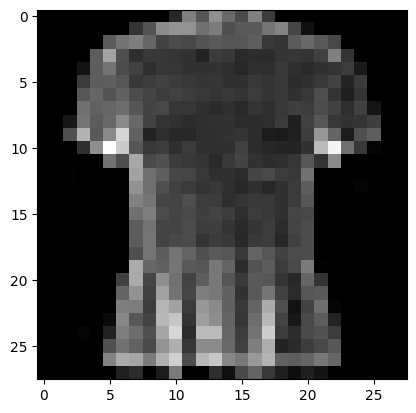

In [45]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.show()


### Stepping through nn.Conv2d()

In [46]:
torch.manual_seed(42)

# create abatch of images

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image bacth shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image bacth shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [47]:
# create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10, kernel_size = 3,
                       stride =1, padding =1)

conv_output = conv_layer(test_image)
conv_output.shape


torch.Size([10, 64, 64])

### Stepping through nn.maxPool2d()

In [48]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_output = max_pool_layer(test_image)

print(f"Original shape of test image: {test_image.shape}")
print(f"Shape of test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")
print(f"Shape after going through conv layer: {conv_output.shape}")
print(f"Shape after going through conv and max_pool layer: {max_pool_output.shape}")

Original shape of test image: torch.Size([3, 64, 64])
Shape of test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv layer: torch.Size([10, 64, 64])
Shape after going through conv and max_pool layer: torch.Size([3, 32, 32])


### Setting up a loss function and optimizer for cnn

In [49]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(),
                            lr=0.1)


### Training and Testing our CNN model

In [50]:
torch.manual_seed(42)

start_timer = timer()

epochs =3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model2,
             train_dataloader,
             optimizer, loss_fn, accuracy_fn, device)
  test_step(model2,
            test_dataloader,
            loss_fn, accuracy_fn, device)
end_timer = timer()
print_traintime(start_timer, end_timer, device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.5828 | Train Acc: 78.89%

Test Loss: 0.3816 | Test Acc: 86.37%

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.3522 | Train Acc: 87.19%

Test Loss: 0.3382 | Test Acc: 87.83%

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.3150 | Train Acc: 88.50%

Test Loss: 0.3250 | Test Acc: 88.35%

Train time on cuda: 35.404174 seconds


In [53]:
model2_to_results = eval_model(model2,
                              train_dataloader,
                              loss_fn, accuracy_fn)
model2_to_results

{'model_name:': 'fashionCNNModel',
 'model_loss:': 0.4777321219444275,
 'model_acc': 83.49640575079871}

In [64]:
import pandas as pd

compare_results = pd.DataFrame(model0_results,
                               model1_results,
                               model2_to_results)
compare_results.reset_index(drop=True)

,model_name:,model_loss:,model_acc
0,fashionModelV0,0.477732,83.496406
1,fashionModelV0,0.477732,83.496406
2,fashionModelV0,0.477732,83.496406


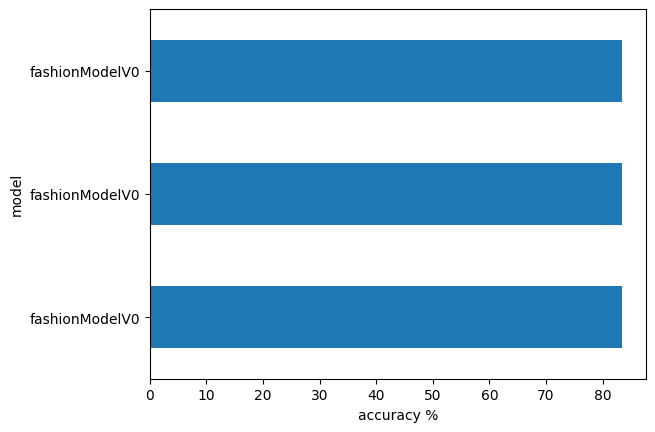

In [67]:
compare_results.set_index('model_name:')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy %')
plt.ylabel('model')
plt.show()

### Make and evaluate random predictions with CNN model

In [85]:
def make_prediction(model: torch.nn.Module,
                    data:int,
                    device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [98]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

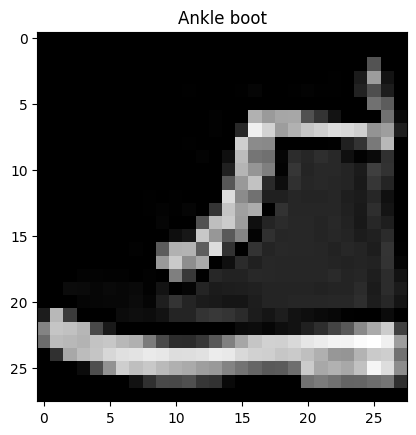

In [99]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [100]:
# Make Predictions

pred_probs = make_prediction(model2, test_samples)
pred_probs[0]

tensor([6.4095e-06, 1.5241e-07, 5.2780e-06, 2.1312e-06, 5.2992e-07, 5.4148e-02,
        6.4829e-06, 1.0976e-02, 7.2354e-04, 9.3413e-01])

In [101]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([9, 7, 2, 0, 1, 0, 4, 5, 4]), [9, 7, 2, 0, 1, 0, 4, 5, 4])

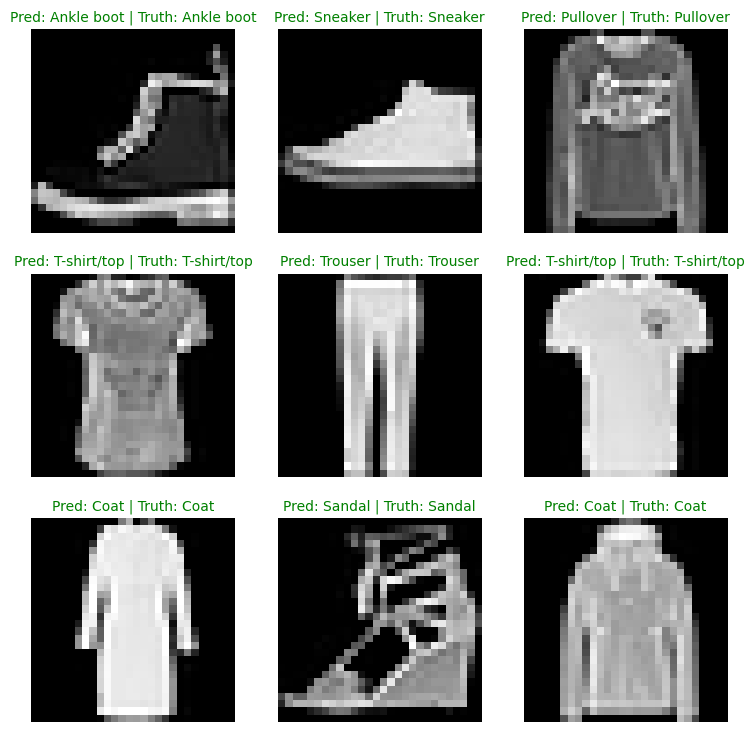

In [102]:
# Plot Predictions

plt.figure(figsize=[9,9])
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c='g')
  else:
    plt.title(title_text, fontsize = 10, c='r')
  plt.axis(False)



### Making a Confusion Matrix

In [108]:
from tqdm.auto import tqdm

y_preds = []
model2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader, desc='making predictions...'):
    x,y = x.to(device), y.to(device)
    y_logits = model2(x)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

  y_pred_tensor = torch.cat(y_preds)
  print(y_pred_tensor[:10])


making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [113]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split('.')[1])>= 19, 'mlxtend version should be 0.19.0 or higher'
except:
  !pip install -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.22.0


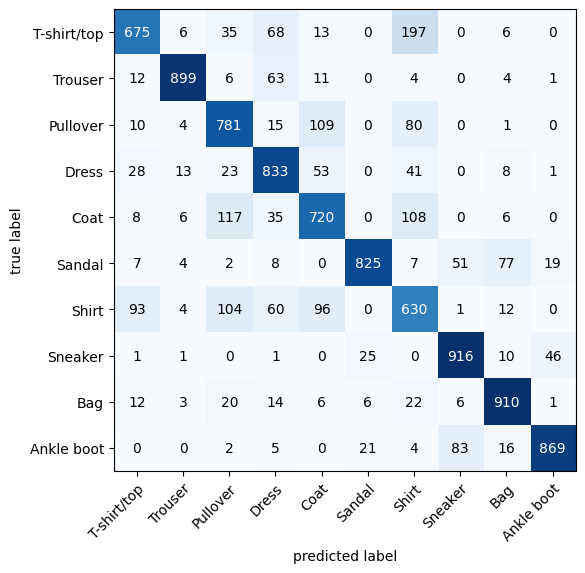

In [116]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

fif, ax = plot_confusion_matrix(conf_mat= confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = [8,6])

### Saving and Loading our best CNN model

In [117]:
from pathlib import Path

model_name = 'FashionMNISTCNNModel2.pth'
model_dir = Path('models')

model_dir.mkdir(parents=True, exist_ok=True)
save_path = model_dir/model_name

print(f"Saving model to: {save_path}")
torch.save(obj= model2.state_dict(), f= save_path)

Saving model to: models/FashionMNISTCNNModel2.pth


In [118]:
torch.manual_seed(42)

loaded_model2 = fashionCNNModel(input_features=1, output_features = len(class_names),
                                hidden_units = 10)

loaded_model2.load_state_dict(torch.load(f= save_path))

<All keys matched successfully>

In [119]:
torch.manual_seed(42)

loaded_model2_results = eval_model(loaded_model2,
                                   test_dataloader,
                                   loss_fn,
                                   accuracy_fn)
loaded_model2_results


{'model_name:': 'fashionCNNModel',
 'model_loss:': 0.4777321219444275,
 'model_acc': 83.49640575079871}